# 1. Overview

# 2. Data Understanding

## 2.1 Data Description

## 2.2 Import necessary libraries

In [27]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings

from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suppress the SettingWithCopyWarning
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

## 2.3 Define Global Variables

In [28]:
company_name = ['Zeiss Group', 'Trumpf Group', 'NTS Group']  
start_date = '2013-01-01'
end_date = datetime.today().strftime("%Y-%m-%d")
output_data = 'data/weekly_data.csv'

## 2.4 Functions

In [29]:
def get_historical_data(ticker_symbol, start_date, end_date):
    """
    Fetches historical stock data for a given company between specified dates. 
    Returns a DataFrame containing the historical data.

    Input:
    - ticker_symbol: The stock ticker of the company (e.g., 'ASML').
    - start_date: The start date for the historical data (e.g., '2000-01-01').
    - end_date: The end date for the historical data (e.g., '2024-10-05').

    Output:
    - A pandas DataFrame containing the historical stock data for the specified period.
    """
    # Define the ticker symbol
    stock_data = yf.Ticker(ticker_symbol)

    # Download historical data between the start and end dates
    historical_data = stock_data.history(start=start_date, end=end_date)

    # Reset the index to convert 'Date' from an index to a regular column
    historical_data.reset_index(inplace=True)

    # Return the resulting DataFrame
    return historical_data

In [30]:
def plot_closing_prices(historical_data, company_name):
    """
    Plots the historical closing prices of a company's stock over time.

    Input:
    - historical_data: DataFrame containing the stock data with 'Date' and 'Close' columns.
    - company_name: The name or ticker of the company to be displayed in the plot title.

    Output:
    - A line plot of the company's historical closing prices.
    """
    # Convert the 'Date' and 'Close' columns to numpy arrays
    dates = np.array(historical_data['Date'])
    close_prices = np.array(historical_data['Close'])

    # Create the plot for the 'Close' (closing price) column using matplotlib
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.plot(dates, close_prices, label='Closing Price', color='blue')

    # Add title and axis labels
    plt.title(f'Historical Closing Prices of {company_name} between {dates[0]} and {dates[-1]}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')

    # Rotate X-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the legend
    plt.legend()

    # Adjust layout to prevent overlap of elements
    plt.tight_layout()

    # Display the plot
    plt.show()

In [31]:
# Groupby daily, weekly, and monthly
def plot_stock_by_period(historical_data, company_name):
    """
    Input: 
    - historical_data: DataFrame containing stock data with 'Date' and 'Close' columns.
    - company_name: String representing the name of the company.

    Output: 
    - Three line plots showing daily, weekly, and monthly average closing prices.
    - Prints the count of data points for each group (daily, weekly, and monthly).

    Logic: 
    - The function resamples the stock data by day, week, and month, computes the average closing price, 
      and generates line plots using Matplotlib for each resampled dataset.
    """

    # Convert 'Date' column to datetime if not already
    historical_data['Date'] = pd.to_datetime(historical_data['Date'])

    # Set 'Date' as the DataFrame index
    historical_data.set_index('Date', inplace=True)

    # Group by different periods
    daily_data = historical_data.resample('D').median()
    weekly_data = historical_data.resample('W').median()
    monthly_data = historical_data.resample('M').median()

    # Print the number of data points for each period
    print(f"Number of daily data points: {daily_data.shape[0]}")
    print(f"Number of weekly data points: {weekly_data.shape[0]}")
    print(f"Number of monthly data points: {monthly_data.shape[0]}")

    # Convert 'Date' and 'Close' columns to NumPy arrays for matplotlib compatibility
    daily_dates = daily_data.index.to_numpy()
    daily_close_prices = daily_data['Close'].to_numpy()

    weekly_dates = weekly_data.index.to_numpy()
    weekly_close_prices = weekly_data['Close'].to_numpy()

    monthly_dates = monthly_data.index.to_numpy()
    monthly_close_prices = monthly_data['Close'].to_numpy()

    # Plot daily data
    plt.figure(figsize=(10, 6))
    plt.plot(daily_dates, daily_close_prices, label='Daily Closing Price', color='blue')
    plt.title(f'{company_name} - Daily Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot weekly data
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_dates, weekly_close_prices, label='Weekly Closing Price', color='green')
    plt.title(f'{company_name} - Weekly Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot monthly data
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_dates, monthly_close_prices, label='Monthly Closing Price', color='red')
    plt.title(f'{company_name} - Monthly Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [32]:
def create_daily_date_list(start_date, end_date):
    # Parse the start and end dates from string format to datetime objects
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")
    
    # Initialize an empty list to store the dates
    date_list = []
    
    # Generate dates by iterating from start to end date with daily frequency
    current_date = start
    while current_date <= end:
        date_list.append(current_date.strftime("%Y-%m-%d"))  # Append date as a string in 'YYYY-MM-DD' format
        current_date += timedelta(days=1)  # Move to the next day

    return date_list

In [33]:
def plot_stock_with_multiple_boxplots(historical_data, company_name):
    """
    Plots the stock's closing price distribution for weekly, monthly, and quarterly with
    multiple boxplots for each period.
    
    Input:
    - historical_data: DataFrame containing stock data with 'Date' and 'Close' columns.
    - company_name: String representing the name of the company.
    
    Output:
    - Boxplots for each period (7 for weekly, 12 for monthly, and 4 for quarterly).
    """

    # Ensure 'Date' column is in datetime format
    historical_data['Date'] = pd.to_datetime(historical_data['Date'])

    # Extract additional time period information
    historical_data['Weekday'] = historical_data['Date'].dt.weekday  # Weekday (0=Monday, 6=Sunday)
    historical_data['Month'] = historical_data['Date'].dt.month      # Month (1=January, 12=December)
    historical_data['Quarter'] = historical_data['Date'].dt.quarter  # Quarter (1 to 4)

    # Plot Weekly Data (7 boxplots for each day of the week)
    plt.figure(figsize=(12, 8))
    historical_data.boxplot(column='Close', by='Weekday', grid=True)
    plt.title(f'{company_name} - Weekly Closing Prices (by Weekday)')
    plt.suptitle('')
    plt.xlabel('Weekday (0=Monday, 6=Sunday)')
    plt.ylabel('Closing Price (USD)')
    plt.show();

    # Plot Monthly Data (12 boxplots for each month)
    plt.figure(figsize=(12, 8))
    historical_data.boxplot(column='Close', by='Month', grid=True)
    plt.title(f'{company_name} - Monthly Closing Prices (by Month)')
    plt.suptitle('')
    plt.xlabel('Month')
    plt.ylabel('Closing Price (USD)')
    plt.show();

    # Plot Quarterly Data (4 boxplots for each quarter)
    plt.figure(figsize=(12, 8))
    historical_data.boxplot(column='Close', by='Quarter', grid=True)
    plt.title(f'{company_name} - Quarterly Closing Prices (by Quarter)')
    plt.suptitle('')
    plt.xlabel('Quarter')
    plt.ylabel('Closing Price (USD)')
    plt.show();


## 2.5 Code

### 2.5.1 Looking at the dataset

We are going to load the data using the function get_historical_data

In [34]:
# Create an empty list to store data for each company
all_data = []

# Load historical data for each company
for company in company_name:
    print(f"Loading data for {company}...")
    
    # Call the function get_historical_data for each company
    historical_data = get_historical_data(company, start_date, end_date)

    # Convert 'Date' column to datetime format and keep only the date (without time)
    historical_data['Date'] = pd.to_datetime(historical_data['Date']).dt.date

    # Add company name to the data
    historical_data['Company'] = company

    # Append to the list
    all_data.append(historical_data)

# Concatenate all data into a single DataFrame
combined_historical_data = pd.concat(all_data, ignore_index=True)

# Display the combined data
combined_historical_data.head()

$ZEISS GROUP: possibly delisted; no timezone found
$TRUMPF GROUP: possibly delisted; no timezone found
$NTS GROUP: possibly delisted; no timezone found


Loading data for Zeiss Group...
Loading data for Trumpf Group...
Loading data for NTS Group...


,Date,Open,High,Low,Close,Adj Close,Volume,Company


Now let's plot the stock data

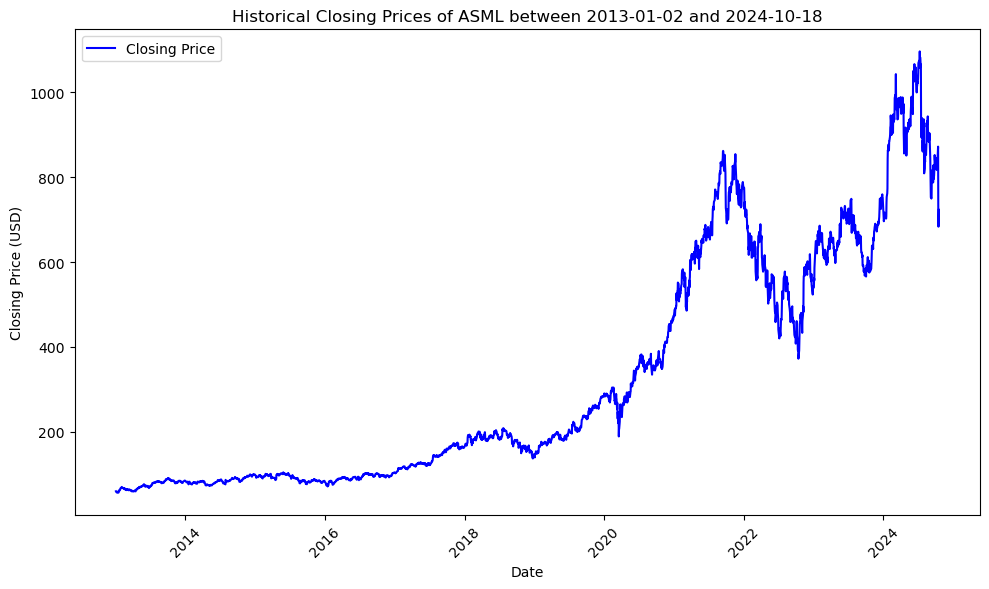

In [9]:
plot_closing_prices(historical_data, company_name)

### 2.5.2 Checking for duplicate values

In [10]:
historical_data.duplicated().sum()

0

There is no duplicated values. So we can continue

### 2.5.3 Checking for missing dates

In [11]:
(historical_data.isna().sum()/len(historical_data))*100

Date            0.0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: float64

As we can see there aren't any null values

Let's check the dates of the data

In [12]:
dates = create_daily_date_list(start_date, end_date)

date_range = pd.DataFrame(dates, columns=["Date"]) 

date_range

,Date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
4307,2024-10-17
4308,2024-10-18
4309,2024-10-19
4310,2024-10-20


In [13]:
# Ensure the 'Date' columns in both DataFrames are in datetime format for merging
historical_data['Date'] = pd.to_datetime(historical_data['Date']).dt.date
date_range['Date'] = pd.to_datetime(date_range['Date']).dt.date

# Perform the merge on the 'Date' column
merged_data = pd.merge(date_range, historical_data, on='Date', how='left')

merged_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,58.742809,59.455055,58.564743,59.455055,1824000.0,0.0,0.0
2,2013-01-03,58.751698,59.018794,57.923707,58.208607,1725400.0,0.0,0.0
3,2013-01-04,57.549792,57.914824,57.291601,57.612114,3170800.0,0.0,0.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4307,2024-10-17,692.640015,703.880005,677.119995,700.599976,7209100.0,0.0,0.0
4308,2024-10-18,717.669983,726.460022,713.179993,723.260010,4535700.0,0.0,0.0
4309,2024-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4310,2024-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are null values because these are weekend dates. We are going to fill these null values doing a forward fill.

In [14]:
# Perform a forward fill to fill NaN values with the previous valid value
historical_data_complete = merged_data.fillna(method='ffill')

# Drop rows with NaN
historical_data_complete = historical_data_complete.dropna().reset_index(drop=True)

# Display the forward-filled DataFrame
historical_data_complete

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3524\4287163570.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_data_complete = merged_data.fillna(method='ffill')


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-01-02,58.742809,59.455055,58.564743,59.455055,1824000.0,0.0,0.0
1,2013-01-03,58.751698,59.018794,57.923707,58.208607,1725400.0,0.0,0.0
2,2013-01-04,57.549792,57.914824,57.291601,57.612114,3170800.0,0.0,0.0
3,2013-01-05,57.549792,57.914824,57.291601,57.612114,3170800.0,0.0,0.0
4,2013-01-06,57.549792,57.914824,57.291601,57.612114,3170800.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4306,2024-10-17,692.640015,703.880005,677.119995,700.599976,7209100.0,0.0,0.0
4307,2024-10-18,717.669983,726.460022,713.179993,723.260010,4535700.0,0.0,0.0
4308,2024-10-19,717.669983,726.460022,713.179993,723.260010,4535700.0,0.0,0.0
4309,2024-10-20,717.669983,726.460022,713.179993,723.260010,4535700.0,0.0,0.0


We will just keep columns: Data and Close

In [15]:
# Keep only the 'Date' and 'Close' columns
historical_data_complete = historical_data_complete[['Date', 'Close']]

# Display the resulting DataFrame
historical_data_complete

,Date,Close
0,2013-01-02,59.455055
1,2013-01-03,58.208607
2,2013-01-04,57.612114
3,2013-01-05,57.612114
4,2013-01-06,57.612114
...,...,...
4306,2024-10-17,700.599976
4307,2024-10-18,723.260010
4308,2024-10-19,723.260010
4309,2024-10-20,723.260010


### 2.5.4 Looking at seasonality

In [16]:
historical_data_complete.reset_index(inplace=True)

<Figure size 1200x800 with 0 Axes>

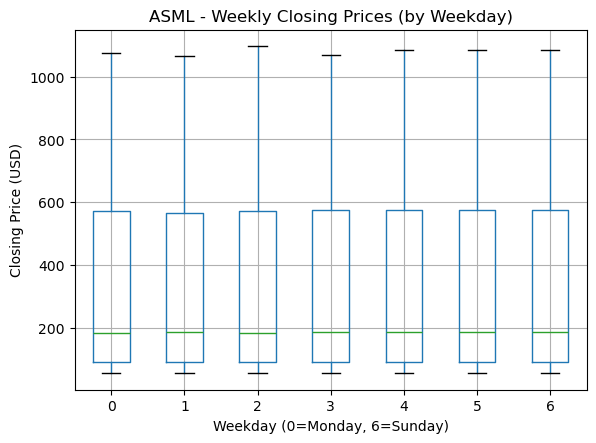

<Figure size 1200x800 with 0 Axes>

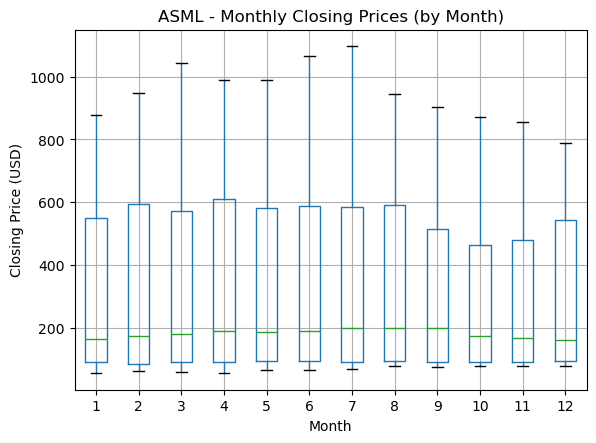

<Figure size 1200x800 with 0 Axes>

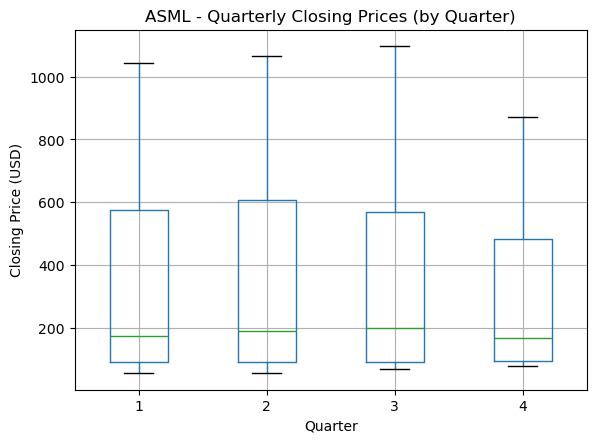

In [17]:
plot_stock_with_multiple_boxplots(historical_data_complete, company_name);

With the results above, we cannot determine if there is any clear seasonality. 

### 2.5.5 Choosing the time series of our dataset

Let's plot the time series doing different groubys to decide what we're going to work with. Having in mind our business case and the data points that we have.

Number of daily data points: 4311
Number of weekly data points: 617
Number of monthly data points: 142


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3524\1328084169.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = historical_data.resample('M').median()


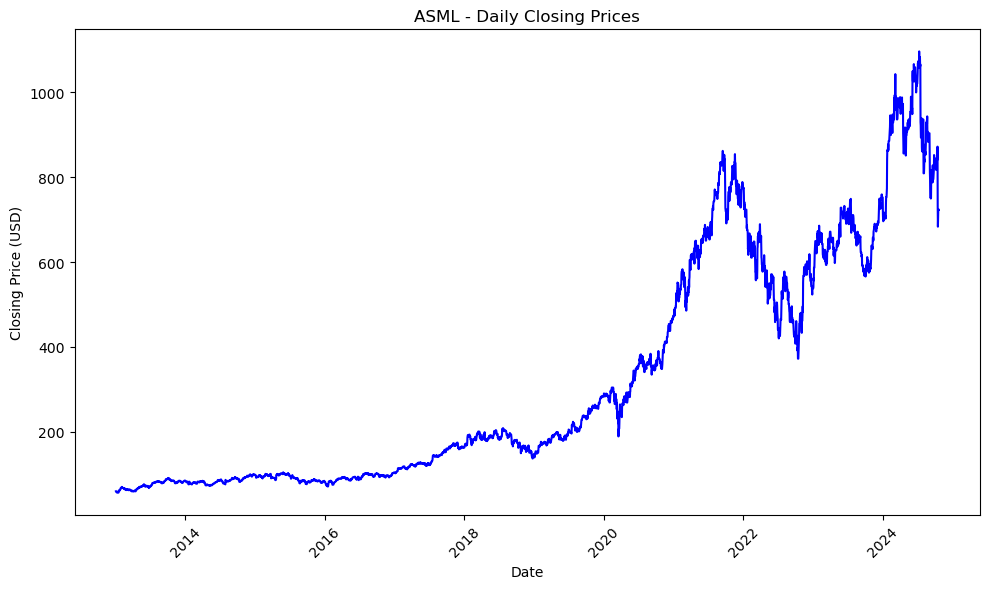

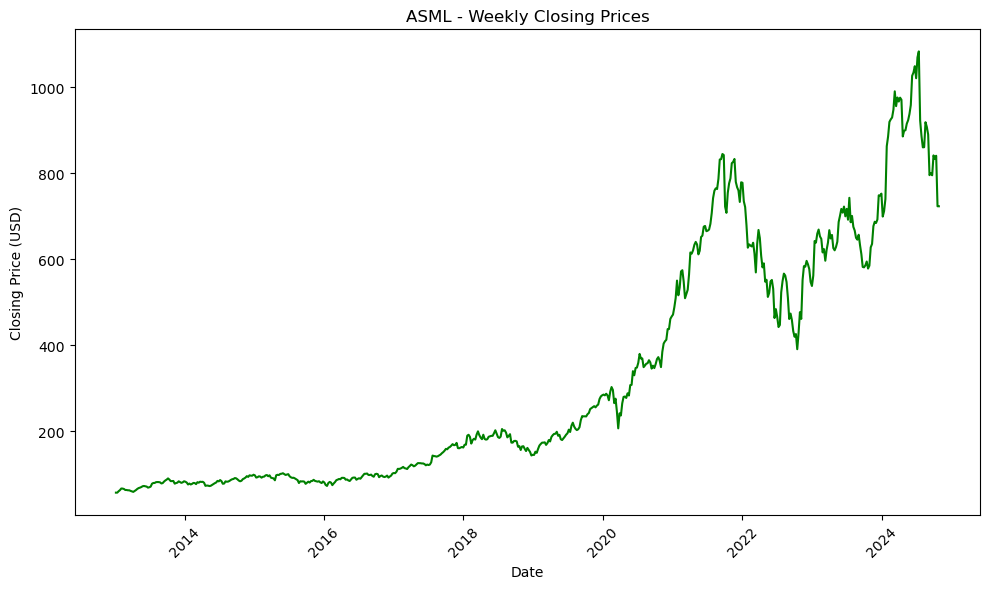

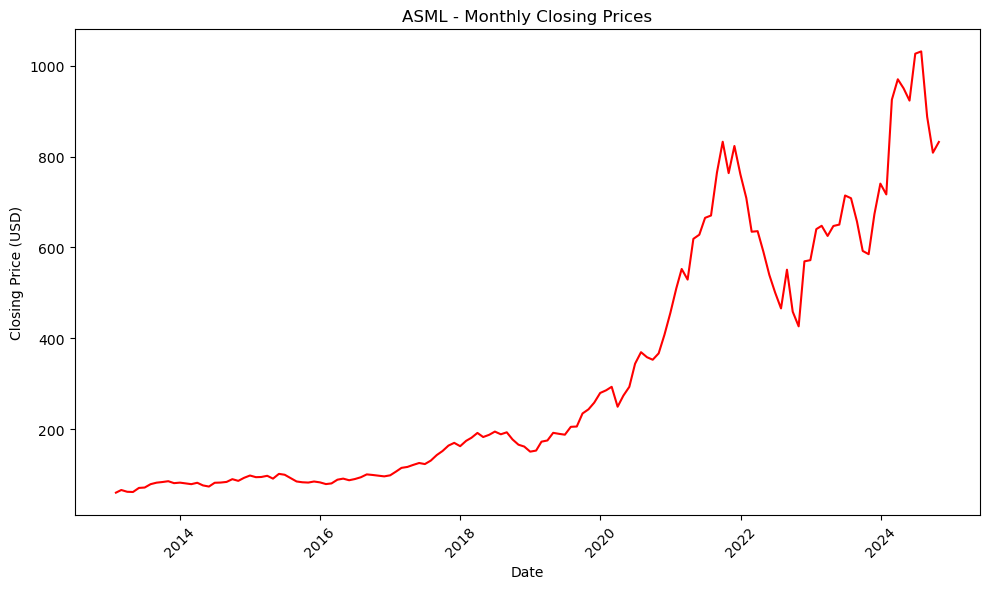

In [18]:
# Call function to plot the data
plot_stock_by_period(historical_data_complete, company_name)

We are going to transform the data. Based on out business case we are going to choose the weekly data because we want to give weekly predictions.

In [19]:
historical_data_complete

,index,Close,Weekday,Month,Quarter
Date,,,,,
2013-01-02,0,59.455055,2,1,1
2013-01-03,1,58.208607,3,1,1
2013-01-04,2,57.612114,4,1,1
2013-01-05,3,57.612114,5,1,1
2013-01-06,4,57.612114,6,1,1
...,...,...,...,...,...
2024-10-17,4306,700.599976,3,10,4
2024-10-18,4307,723.260010,4,10,4
2024-10-19,4308,723.260010,5,10,4


We are going to eliminate the week end date to avoid distorsions on the weekly data calculus

In [20]:
# Filter the dataframe to exclude weekends
historical_data_complete = historical_data_complete[historical_data_complete.index.weekday < 5]

In [21]:
historical_data_complete

,index,Close,Weekday,Month,Quarter
Date,,,,,
2013-01-02,0,59.455055,2,1,1
2013-01-03,1,58.208607,3,1,1
2013-01-04,2,57.612114,4,1,1
2013-01-07,5,56.677265,0,1,1
2013-01-08,6,56.214302,1,1,1
...,...,...,...,...,...
2024-10-15,4304,730.429993,1,10,4
2024-10-16,4305,683.520020,2,10,4
2024-10-17,4306,700.599976,3,10,4


In [22]:
# Set 'Date' as the DataFrame index
# historical_data_complete.set_index('Date', inplace=True)
weekly_data = historical_data_complete.resample('W').median()

In [23]:
weekly_data = weekly_data[['Close']]
weekly_data

,Close
Date,
2013-01-06,58.208607
2013-01-13,56.677265
2013-01-20,57.336109
2013-01-27,62.250618
2013-02-03,67.013779
...,...
2024-09-29,818.179993
2024-10-06,832.409973
2024-10-13,833.969971


# 3. Export the data

In [30]:
# We just want the "Close" column
weekly_data = weekly_data.drop(['Z_score','Returns'], axis=1)
# Export the weekly_data to a CSV file
weekly_data.to_csv(output_data, index=True, sep=';')